<a href="https://colab.research.google.com/github/periclesrialto/PatternRecognition/blob/main/Clusters_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = pd.read_csv('dataset1.txt', header = None, delim_whitespace=True)
df2 = pd.read_csv('dataset2.txt', header = None, delim_whitespace=True)
df3 = pd.read_csv('dataset3.txt', header = None, delim_whitespace=True)
df4 = pd.read_csv('dataset4.txt', header = None, delim_whitespace=True)

# **Análise Dataset 01**

In [ ]:
df1_columns = []
df1_index = []

for i in range(len(df1.columns)):
  df1_columns.append('F'+ str(i))
df1.columns = df1_columns

for i in range(len(df1.index)):
  df1_index.append('I'+ str(i)) 
df1.index = df1_index

df1

,F0,F1,F2,F3,F4,F5,F6,F7
I0,461,501,472,486,517,509,480,515
I1,487,511,501,499,490,495,485,512
I2,505,506,494,529,495,536,528,522
I3,490,507,497,504,487,507,539,461
I4,504,491,478,517,472,467,508,514
...,...,...,...,...,...,...,...,...
I2043,603,584,595,582,567,572,573,621
I2044,595,625,630,606,589,620,611,616
I2045,608,628,592,582,610,615,569,589
I2046,604,599,587,627,574,626,619,619


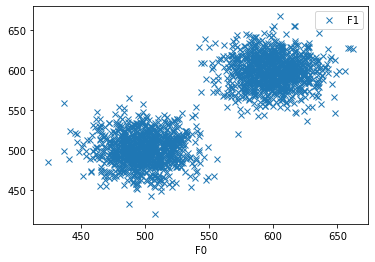

In [ ]:
df1.plot(x='F0', y='F1', style='x')

**Hierarchical Clustering - Distance Matrix**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


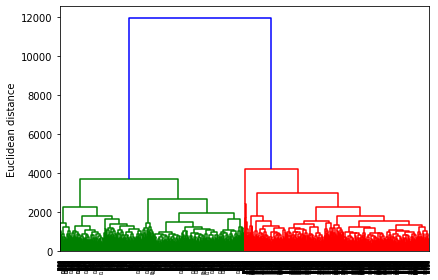

In [ ]:
row_dist = pd.DataFrame(squareform(pdist(df1, metric='euclidean')),
                        columns=df1_index,
                        index=df1_index)

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

row_dendr = dendrogram(row_clusters, 
                       labels=df1_index
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

**Elbow Method**

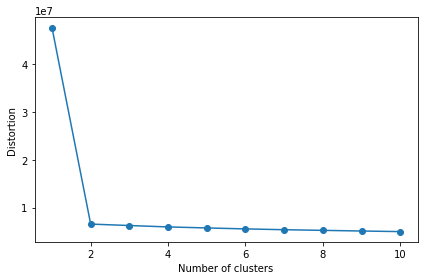

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df1)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

**Silhouette Method**

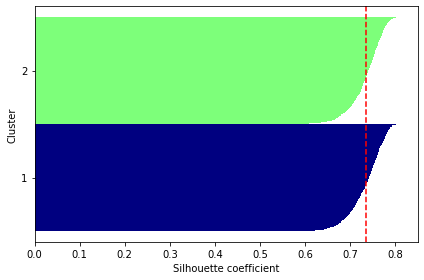

In [ ]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(df1)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df1, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

**Centroide dos clusters**

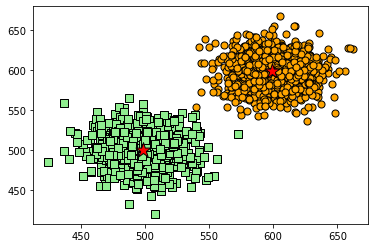

In [ ]:
plt.scatter(df1.iloc[y_km == 0, 0],
            df1.iloc[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(df1.iloc[y_km == 1, 0],
            df1.iloc[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

# **Análise Dataset 02**

In [ ]:
df2_columns = []
df2_index = []

for i in range(len(df2.columns)):
  df2_columns.append('F'+ str(i))
df2.columns = df2_columns

for i in range(len(df2.index)):
  df2_index.append('I'+ str(i)) 
df2.index = df2_index

df2

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F54,F55,F56,F57,F58,F59,F60,F61,F62,F63
I0,480,471,552,414,514,452,388,392,527,589,...,502,485,453,508,420,559,545,502,605,484
I1,521,512,511,471,413,522,537,476,416,488,...,564,533,504,564,515,495,558,445,455,517
I2,518,456,449,478,425,576,500,518,445,497,...,493,558,530,507,512,455,440,510,553,524
I3,476,507,417,514,522,511,465,521,558,516,...,380,643,453,464,466,517,537,447,455,534
I4,417,540,567,560,447,459,557,420,538,586,...,514,504,509,439,464,490,487,471,552,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I2043,549,622,553,532,538,628,585,576,577,706,...,591,631,598,647,553,590,603,610,541,591
I2044,560,544,607,569,696,595,543,589,604,622,...,668,609,576,650,573,608,621,625,618,596
I2045,631,573,684,573,622,568,598,544,610,593,...,598,606,584,589,617,592,542,647,589,523
I2046,569,584,616,631,595,642,508,605,582,580,...,551,604,658,608,539,619,636,671,577,553


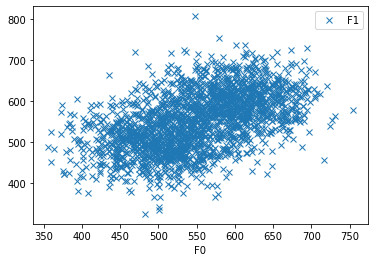

In [ ]:
df2.plot(x='F0', y='F1', style='x')

**Variance analysis**

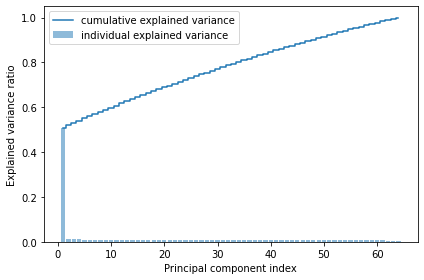

In [ ]:
sc = StandardScaler()
df2_sc = sc.fit_transform(df2)

cov_mat = np.cov(df2_sc.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 65), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 65), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
eigen_vals

array([32.59786269,  0.67268763,  0.66126438,  0.66021447,  0.64901909,
        0.34235713,  0.63378458,  0.36009414,  0.3617744 ,  0.62239129,
        0.61433869,  0.60873193,  0.60763979,  0.3722099 ,  0.60073406,
        0.37836416,  0.38011481,  0.38630629,  0.38826803,  0.58924268,
        0.5873475 ,  0.58311071,  0.58031192,  0.39579555,  0.39864775,
        0.5729489 ,  0.40451117,  0.56707278,  0.56207736,  0.55953114,
        0.41086069,  0.41399027,  0.41760832,  0.55054212,  0.42449887,
        0.43270808,  0.43396655,  0.43963043,  0.43703379,  0.44432208,
        0.44716351,  0.45023443,  0.54658128,  0.54001116,  0.53842878,
        0.53521317,  0.45500258,  0.4593739 ,  0.46487025,  0.46701102,
        0.46858285,  0.47578844,  0.48173524,  0.52972274,  0.48810044,
        0.49274763,  0.49546805,  0.49945929,  0.50637436,  0.5228502 ,
        0.51172661,  0.51834674,  0.51696403,  0.51559244])

**Hierarchical Clustering - Distance Matrix**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


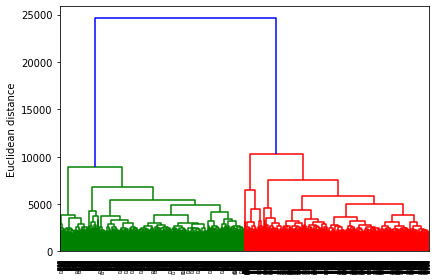

In [ ]:
row_dist = pd.DataFrame(squareform(pdist(df2, metric='euclidean')),
                        columns=df2_index,
                        index=df2_index)

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

row_dendr = dendrogram(row_clusters, 
                       labels=df2_index
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

**Elbow Method**

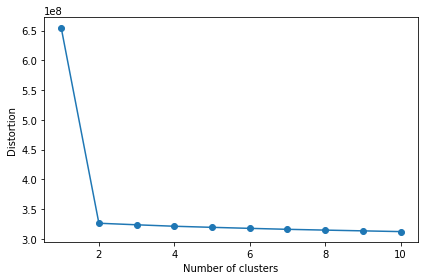

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df2)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

**Silhouette Method**

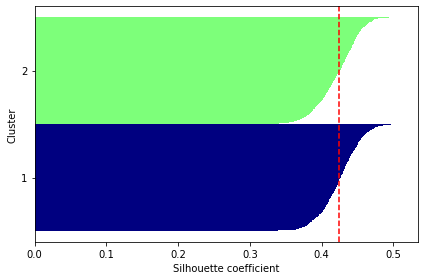

In [ ]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(df2)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df2, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

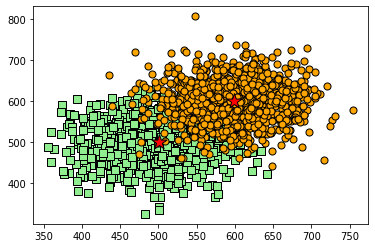

In [ ]:
plt.scatter(df2.iloc[y_km == 0, 0],
            df2.iloc[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(df2.iloc[y_km == 1, 0],
            df2.iloc[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

# **Análise Dataset 03**

In [ ]:
df3_columns = []
df3_index = []

for i in range(len(df3.columns)):
  df3_columns.append('F'+ str(i))
df3.columns = df3_columns

for i in range(len(df3.index)):
  df3_index.append('I'+ str(i)) 
df3.index = df3_index

df3

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
I0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
I1,29020,860619,658827,854383,199909,71042,181528,450820,43739,345940,789286,362103,620337,310595,461270
I2,32683,862625,671429,818015,192524,52264,146394,447133,36171,378042,784684,356856,594499,319498,478757
I3,34519,859181,678552,824984,194710,50986,164282,448693,14559,369041,776997,367400,615245,281741,445673
I4,35250,847859,652480,828636,196389,63096,166515,429911,54324,368559,765723,361038,623793,299209,443797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I10121,894979,754037,463363,52749,142215,102792,98765,616101,142865,344026,491583,433135,407526,711452,138120
I10122,897401,769746,475172,73804,117919,107051,116707,628170,146481,349597,494219,435437,385405,717765,140622
I10123,897758,761942,459441,90884,155699,103705,110074,603910,129993,351731,470304,437934,392910,696408,158048
I10124,897880,763042,462386,48252,153304,89097,116990,607362,141258,329327,492035,424813,375089,697630,130641


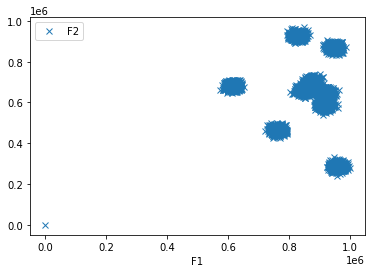

In [ ]:
df3.plot(x='F1', y='F2', style='x')

**Hierarchical Clustering - Distance Matrix**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


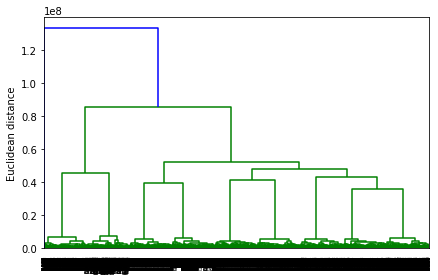

In [ ]:
row_dist = pd.DataFrame(squareform(pdist(df3, metric='euclidean')),
                        columns=df3_index,
                        index=df3_index)

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

row_dendr = dendrogram(row_clusters, 
                       labels=df3_index
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

**Elbow Method**

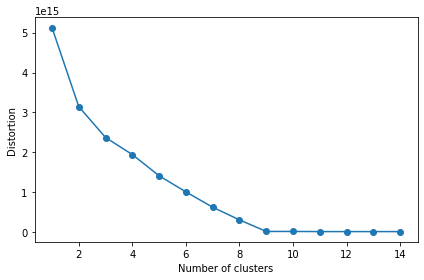

In [ ]:
distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df3)
    distortions.append(km.inertia_)
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

**Silhouette Method**

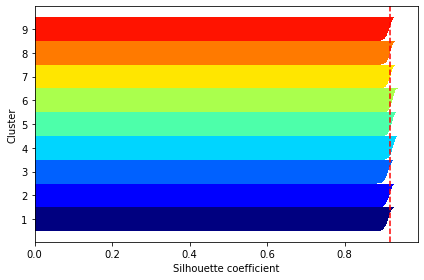

In [ ]:
km = KMeans(n_clusters=9, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(df3)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df3, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

**Centroide dos clusters**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

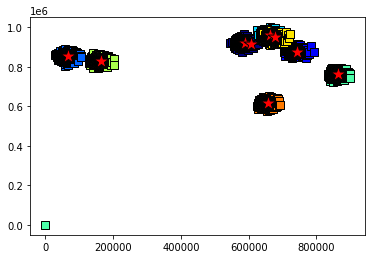

In [ ]:
for cluster in range(0,8):
  color = cm.jet(float(cluster) / 9)
  plt.scatter(df3.iloc[y_km == cluster, 0],
              df3.iloc[y_km == cluster, 1],
              s=50, c=color,
              marker='s', edgecolor='black',
              label='Cluster'+str(cluster))

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

# **Análise Dataset 04**

In [ ]:
df4_columns = []
df4_index = []

for i in range(len(df4.columns)):
  df4_columns.append('F'+ str(i))
df4.columns = df4_columns

for i in range(len(df4.index)):
  df4_index.append('I'+ str(i)) 
df4.index = df4_index

df4

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F1014,F1015,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023
I0,126,151,205,39,163,36,136,187,113,196,...,86,112,165,173,204,91,59,149,139,128
I1,126,151,205,39,162,36,136,187,113,195,...,86,112,165,174,204,91,59,148,139,127
I2,126,151,205,39,163,36,137,188,113,195,...,86,111,165,173,204,91,59,148,139,127
I3,126,151,204,39,162,37,136,187,113,194,...,87,112,165,172,203,91,59,148,140,127
I4,127,151,206,39,162,36,135,188,112,195,...,86,112,165,173,204,91,59,148,139,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I1019,147,132,73,127,94,35,189,83,214,84,...,47,62,181,48,74,119,136,76,147,191
I1020,148,133,74,126,93,35,189,82,213,85,...,46,62,182,49,76,119,136,75,146,190
I1021,148,132,74,126,94,36,188,83,215,84,...,46,62,182,49,75,119,136,75,147,191
I1022,148,133,74,126,94,36,189,82,215,84,...,46,62,182,49,75,120,136,76,147,191


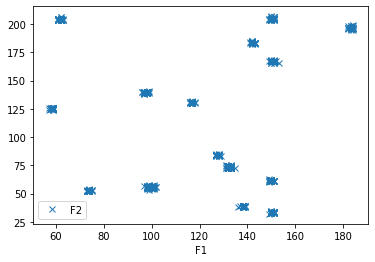

In [ ]:
df4.plot(x='F1', y='F2', style='x')

**Elbow Method**

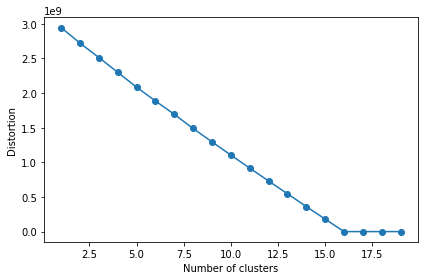

In [ ]:
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df4)
    distortions.append(km.inertia_)
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

**Hierarchical Clustering - Distance Matrix**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


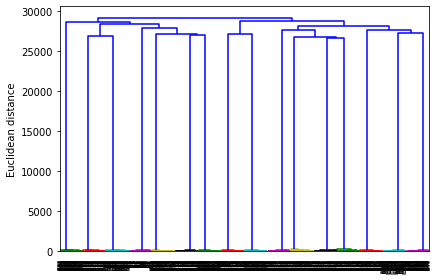

In [ ]:
row_dist = pd.DataFrame(squareform(pdist(df4, metric='euclidean')),
                        columns=df4_index,
                        index=df4_index)

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

row_dendr = dendrogram(row_clusters, 
                       labels=df4_index
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

**Silhouette Method**

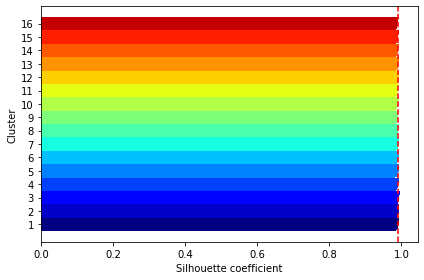

In [ ]:
km = KMeans(n_clusters=16, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(df4)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df4, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

**Centroide dos clusters**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

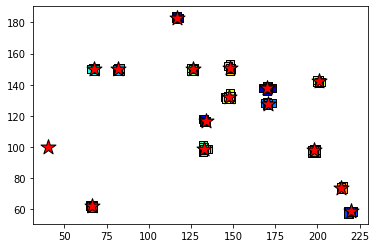

In [ ]:
for cluster in range(0,15):
  color = cm.jet(float(cluster) / 16)
  plt.scatter(df4.iloc[y_km == cluster, 0],
              df4.iloc[y_km == cluster, 1],
              s=50, c=color,
              marker='s', edgecolor='black',
              label='Cluster'+str(cluster))

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')